In [1]:
# the following lines disable the numpy multithreading [optional]
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

from julia.api import Julia
jl = Julia(compiled_modules=False)
from julia import KitBase as kt

import matplotlib.pyplot as plt

from examples.nonlinear.boltzmann_3d_pbc_upwind1 import Boltzmann
prob = Boltzmann()

┌ Warning: Replacing docs for `SciMLBase.sol :: Union{Tuple, Tuple{D}, Tuple{S}, Tuple{N}, Tuple{T}} where {T, N, S, D}` in module `SciMLBase`
└ @ Base.Docs docs/Docs.jl:240
[ Info: Kinetic will run with 1 worker and 1 thread


In [2]:
# for Jupyter
prob.document = 'None'
prob.betas = [0]

In [3]:
# choosing a number of points
prob.spatial_points = [100, 48, 28, 28]
prob.time_points = 3

# choosing a time domain
prob.T_start = 0

# choosing the number of intervals handled in parallel
prob.time_intervals = 1
prob.rolling = 8

prob.T_end = 8e-2 #prob.rolling * prob.time_intervals

# choosing a parallelization strategy
prob.proc_col = 1
prob.proc_row = prob.time_intervals

# choosing a solver
prob.solver = 'gmres'

# setting maximum number of iterations
prob.maxiter = 10
prob.smaxiter = 50

# choosing a setting for the alpha sequence
prob.alphas = [1e-6]

# setting tolerances
prob.tol = 1e-4
prob.stol = 1e-6

prob.setup()
prob.solve()
prob.summary(details=True)

----------------
 discretization 
----------------
solving on [0, 0.1]
no. of spatial points = [100, 48, 28, 28], dx = [0.01, 0.3333333333333333, 0.5714285714285714, 0.5714285714285714]
no. of time intervals = 1, dt = 0.01
collocation points = [0.00155 0.00645 0.01   ]
alphas = [0]
betas = [0]
rolling intervals = 10

-----------------
 parallelization 
-----------------
proc. for collocation-space problem: 1
proc. for time problem: 1
total: 1

-------
 other 
-------
maxiter of paradiag = 10
output document = None
tol = 0.0001
inner solver = gmres
inner solver tol = 1e-06
inner solver maxiter = 50

--------
 output 
--------
convergence = 1
iterations of paradiag = [2, 2, 1, 1, 5, 5, 5, 5, 6, 5]
total iterations of paradiag = 37
max iterations of paradiag = 6
min iterations of paradiag = 1

algorithm time = 581.23686 s
communication time = 0.00000 s

consecutive errors = 
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
[inf]
residuals = 
[0.00252838, 0.000180334, 2.46781e-05]
[0.

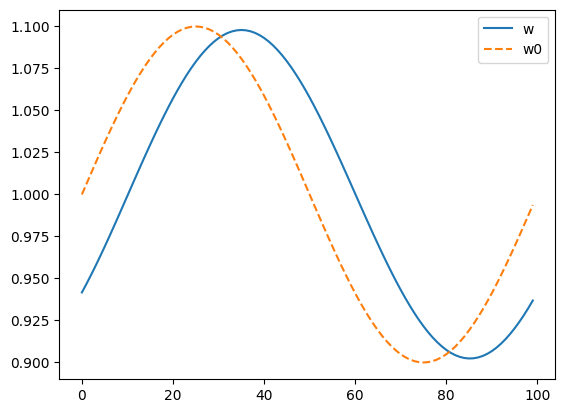

In [4]:
import numpy as np
prob.__fill_u_last__(fill_old=False)

w0 = np.zeros((prob.spatial_points[0], 5))
w = np.zeros_like(w0)

f0 = prob.u_initial(0)
f = prob.u_last_loc.reshape(prob.spatial_points)

for i in range(prob.spatial_points[0]):
    w0[i, :] = kt.moments_conserve(f0[i, :, :, :].real, prob.vs.u, prob.vs.v, prob.vs.w, prob.vs.weights)
    w[i, :] = kt.moments_conserve(f[i, :, :, :].real, prob.vs.u, prob.vs.v, prob.vs.w, prob.vs.weights)
    
plt.plot(w[:, 1])
plt.plot(w0[:, 1], '--')
plt.legend(['w', 'w0'])
plt.savefig('w_and_w0.png', dpi=500)
plt.show()
    